# Named Entity Recognition (NER)

Named Entity Recognition (NER) is a Natural Language Processing (NLP) task that automatically identifies and classifies important information (entities) from text into predefined categories.

---

### Common Entity Types
*   **PERSON**: Names of people
*   **ORG**: Organizations, companies, institutions
*   **LOC**: Locations, cities, countries
*   **DATE/TIME**: Dates or times
*   **MONEY/QUANTITY**: Numeric values, monetary values

---

### Example

> **Sentence**: “Google hired John in New York.”

**Output**:
*   `Google` → **ORG**
*   `John` → **PERSON**
*   `New York` → **LOC**

---

### How It Works

Modern NER systems use Machine Learning and Deep Learning, especially Transformer-based models (like **BERT**), to understand the context of words in a sentence. These models are trained on large datasets to learn patterns and accurately label each word with the correct entity type.

---

### Use Cases

Chatbots, search engines, resume parsing, medical text mining, and general information extraction.


In [2]:
# load model and run NER
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")  # small English model

text = "Google hired John Smith in New York on January 10, 2025 for $150,000."
doc = nlp(text)

# print entities
for ent in doc.ents:
    print(ent.text, ent.label_)

# visualize in Jupyter (renders HTML)
displacy.render(doc, style="ent", jupyter=True)

Google ORG
John Smith PERSON
New York GPE
January 10, 2025 DATE
150,000 MONEY


In [3]:
# tiny training example (annotations in spaCy offset format)
import spacy
from spacy.training import Example

# Create blank English model and add ner component
nlp = spacy.blank("en")
if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")

# Example training data: list of (text, {"entities":[(start,end,label), ...]})
TRAIN_DATA = [
    ("Google hired John Smith in New York.", {"entities": [(0, 6, "ORG"), (13, 23, "PERSON"), (27,35,"LOC")]}),
    ("Microsoft acquired LinkedIn in 2016.", {"entities": [(0,9,"ORG"), (19,25,"ORG"), (29,33,"DATE")]}),
]

# Add labels to the NER
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other pipes for training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.select_pipes(disable=other_pipes):
    optimizer = nlp.begin_training()
    for itn in range(30):  # small number of iterations for demo
        losses = {}
        for text, annotations in TRAIN_DATA:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], sgd=optimizer, drop=0.35, losses=losses)
        if (itn+1) % 10 == 0:
            print(f"Iter {itn+1}, Losses: {losses}")

# Test the trained model
test_text = "John Smith joined Google in New York."
doc = nlp(test_text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Iter 10, Losses: {'ner': 4.686191401910037}


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Microsoft acquired LinkedIn in 2016." with entities "[(0, 9, 'ORG'), (19, 25, 'ORG'), (29, 33, 'DATE')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Iter 20, Losses: {'ner': 4.301400605207241}
Iter 30, Losses: {'ner': 1.1188306987914907}
John Smith PERSON
Google ORG
New York LOC


In [4]:
sentence="The Eiffel Tower was built from 1887 to 1889 by Gustave Eiffel, whose company specialized in building metal frameworks and structures."

In [5]:
import nltk
words = nltk.word_tokenize(sentence)

In [6]:
tag_elements = nltk.pos_tag(words) ## Each and every words is assing by tags

In [10]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [svgling]


In [11]:
import svgling

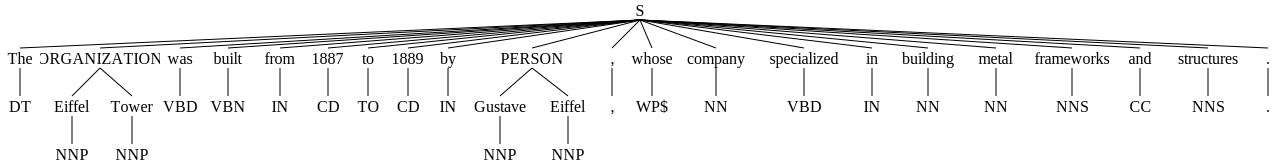

In [12]:
nltk.ne_chunk(tag_elements)

In [8]:
import nltk
nltk.download('svgling')

[nltk_data] Error loading svgling: Package 'svgling' not found in
[nltk_data]     index


False